In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [61]:
train_df = pd.read_csv("./inputs/train.csv").set_index("id")
target = train_df["rainfall"]
train_df.drop("day", axis=1, inplace=True)
train_df.drop("rainfall", axis=1, inplace=True)
train_df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [62]:
scaler = StandardScaler()
scaler.fit(train_df)
scaled_data = scaler.transform(train_df)
scaled_data

array([[ 0.67170214, -0.91380916, -0.64219876, ..., -0.72939738,
        -0.56090052, -0.4652908 ],
       [ 1.04311572, -1.79828913, -1.35084574, ..., -1.03280391,
        -0.6859253 ,  0.00962944],
       [ 1.85668833, -1.23222195, -1.50406671, ...,  1.25653632,
        -0.43587575, -0.37434863],
       ...,
       [-0.05343865, -1.30298035, -1.46576147, ...,  0.34631671,
        -0.81095007,  1.12114491],
       [ 1.53833383, -1.76290993, -1.6764403 , ..., -1.0052215 ,
        -0.81095007, -0.38445331],
       [ 0.03499315, -0.91380916, -0.92948808, ..., -0.75697979,
        -0.43587575,  2.6469525 ]])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.2, random_state=42)

In [64]:
clf = CatBoostClassifier(n_estimators=10000, learning_rate=0.001, max_depth=5, random_state=42)
clf.load_model("./outputs/catboost.model")
clf.fit(X_train, y_train)
clf.save_model("./outputs/catboost.model")
y_pred = clf.predict(X_test)
score = roc_auc_score(y_test, y_pred)
print(score)

0:	learn: 0.6923155	total: 3.44ms	remaining: 34.3s
1:	learn: 0.6914763	total: 6.63ms	remaining: 33.2s
2:	learn: 0.6906131	total: 9.63ms	remaining: 32.1s
3:	learn: 0.6897633	total: 13.7ms	remaining: 34.3s
4:	learn: 0.6889162	total: 17.4ms	remaining: 34.7s
5:	learn: 0.6880254	total: 21.3ms	remaining: 35.5s
6:	learn: 0.6871154	total: 26.1ms	remaining: 37.3s
7:	learn: 0.6862220	total: 31ms	remaining: 38.7s
8:	learn: 0.6853213	total: 34.7ms	remaining: 38.5s
9:	learn: 0.6844742	total: 38.3ms	remaining: 38.3s
10:	learn: 0.6835862	total: 41.9ms	remaining: 38.1s
11:	learn: 0.6827181	total: 44.8ms	remaining: 37.3s
12:	learn: 0.6818480	total: 48.3ms	remaining: 37.1s
13:	learn: 0.6809807	total: 52.7ms	remaining: 37.6s
14:	learn: 0.6801745	total: 61.9ms	remaining: 41.2s
15:	learn: 0.6792327	total: 66.8ms	remaining: 41.7s
16:	learn: 0.6783741	total: 70.4ms	remaining: 41.3s
17:	learn: 0.6775826	total: 73.1ms	remaining: 40.6s
18:	learn: 0.6768140	total: 76.1ms	remaining: 40s
19:	learn: 0.6759561	total

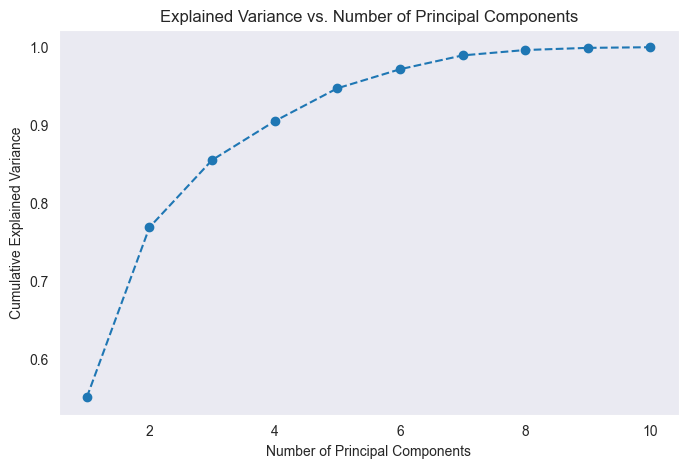

Explained Variance Ratios: [0.55066051 0.21814187 0.08633477 0.04993684 0.0421872  0.02445659
 0.01777808 0.00690249 0.00278423 0.00081742]
Cumulative Variance: [0.55066051 0.76880238 0.85513715 0.90507399 0.94726118 0.97171777
 0.98949586 0.99639834 0.99918258 1.        ]


In [65]:
# Introducing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid()
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

In [66]:
X_pca = pca.transform(scaled_data)[:, :8]
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)

In [67]:
clf = CatBoostClassifier(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
clf.load_model("./outputs/catboost.model")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = roc_auc_score(y_test, y_pred)
print(score)

0:	learn: 0.6922924	total: 2.37ms	remaining: 23.7s
1:	learn: 0.6913356	total: 4.91ms	remaining: 24.5s
2:	learn: 0.6904234	total: 7.18ms	remaining: 23.9s
3:	learn: 0.6894854	total: 9.36ms	remaining: 23.4s
4:	learn: 0.6886256	total: 11.5ms	remaining: 23s
5:	learn: 0.6876821	total: 14.1ms	remaining: 23.4s
6:	learn: 0.6867950	total: 16.3ms	remaining: 23.2s
7:	learn: 0.6859359	total: 19ms	remaining: 23.7s
8:	learn: 0.6850056	total: 21.6ms	remaining: 24s
9:	learn: 0.6841725	total: 24.3ms	remaining: 24.2s
10:	learn: 0.6833270	total: 26.7ms	remaining: 24.3s
11:	learn: 0.6824656	total: 29.3ms	remaining: 24.4s
12:	learn: 0.6816201	total: 31.5ms	remaining: 24.2s
13:	learn: 0.6807390	total: 34.2ms	remaining: 24.4s
14:	learn: 0.6799372	total: 37.2ms	remaining: 24.8s
15:	learn: 0.6790627	total: 40.3ms	remaining: 25.2s
16:	learn: 0.6781650	total: 43.7ms	remaining: 25.6s
17:	learn: 0.6772681	total: 46.5ms	remaining: 25.8s
18:	learn: 0.6764054	total: 49.4ms	remaining: 25.9s
19:	learn: 0.6756266	total: 